In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/Volumes/T7/PC_implementation/implementation6.20/Twitter API/predicted/tweets_boxer_pre.csv'
df = pd.read_csv(file_path)

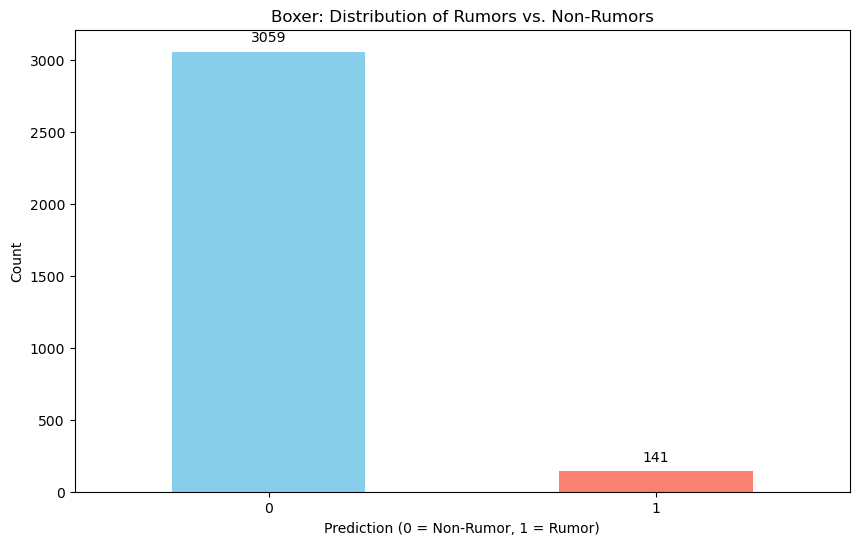

In [42]:
# Basic distribution analysis
# Assuming 1 = rumor, 0 = non-rumor
rumor_counts = df['prediction'].value_counts()

# Plot the distribution of rumors vs. non-rumors
plt.figure(figsize=(10, 6))
ax = rumor_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Boxer: Distribution of Rumors vs. Non-Rumors')
plt.xlabel('Prediction (0 = Non-Rumor, 1 = Rumor)')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

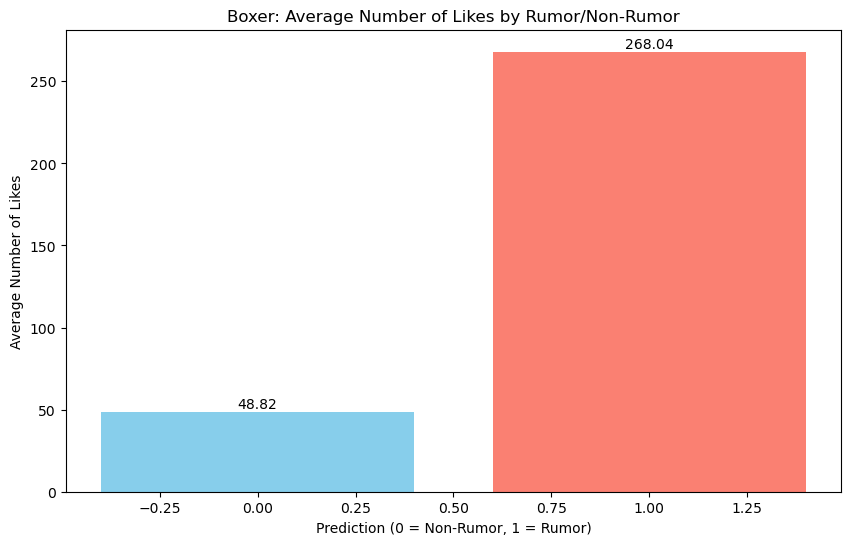

In [43]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Ensure 'Number of Likes' is numeric
df['Number of Likes'] = pd.to_numeric(df['Number of Likes'], errors='coerce')

# Basic engagement metrics analysis using 'Number of Likes'
engagement_metrics = df.groupby('prediction').mean(numeric_only=True)[['Number of Likes']]

# Plot the average engagement metrics by rumor/non-rumor
plt.figure(figsize=(10, 6))
ax = plt.bar(engagement_metrics.index, engagement_metrics['Number of Likes'], color=['skyblue', 'salmon'])

plt.title('Boxer: Average Number of Likes by Rumor/Non-Rumor')
plt.xlabel('Prediction (0 = Non-Rumor, 1 = Rumor)')
plt.ylabel('Average Number of Likes')
plt.xticks(rotation=0)

# Add labels on top of the bars
for i, bar in enumerate(ax):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.2f}', ha='center', va='bottom')

plt.show()# Strip whitespace from column names


In [22]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Continue with your sentiment analysis

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/weishen/nltk_data...


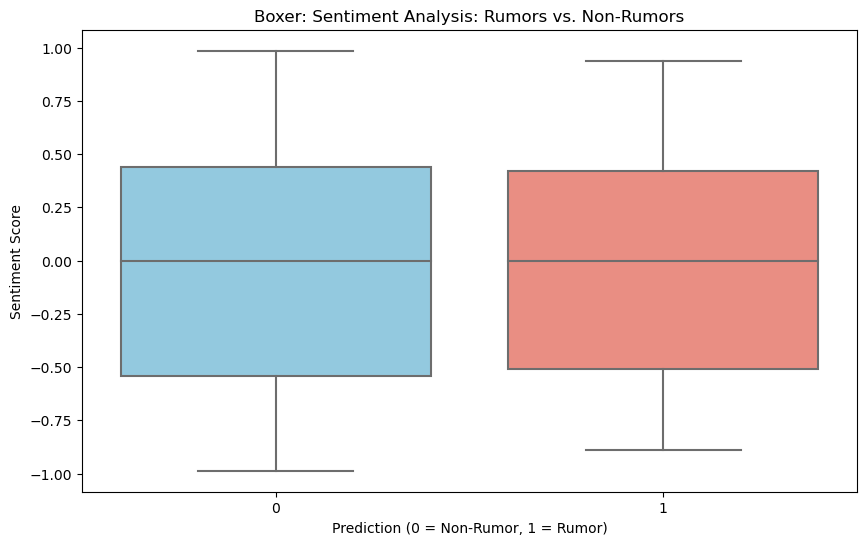

In [44]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each tweet
df['sentiment'] = df['Tweet'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Plot the sentiment distribution for rumors vs. non-rumors
plt.figure(figsize=(10, 6))
sns.boxplot(x='prediction', y='sentiment', data=df, palette=['skyblue', 'salmon'])
plt.title('Boxer: Sentiment Analysis: Rumors vs. Non-Rumors')
plt.xlabel('Prediction (0 = Non-Rumor, 1 = Rumor)')
plt.ylabel('Sentiment Score')
plt.show()

Found 0 invalid dates.


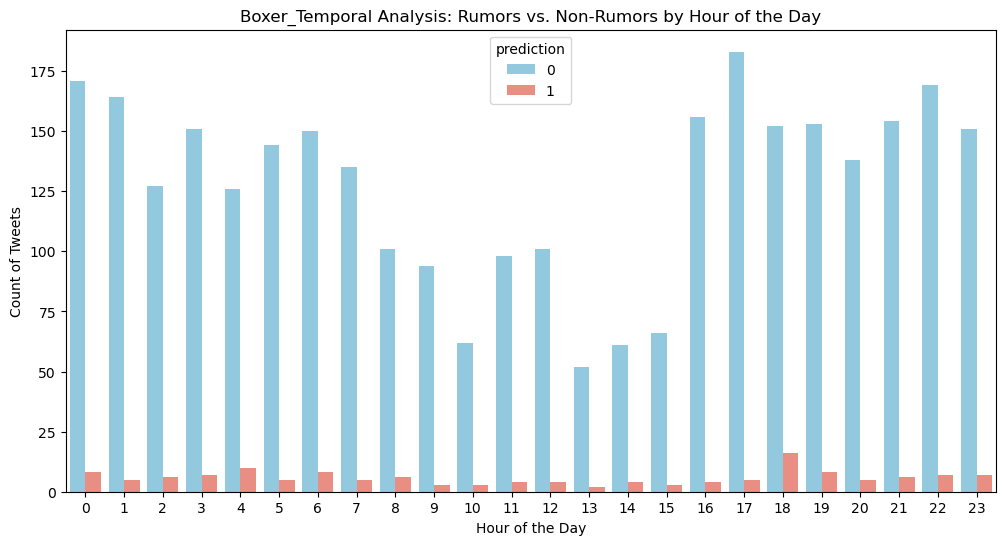

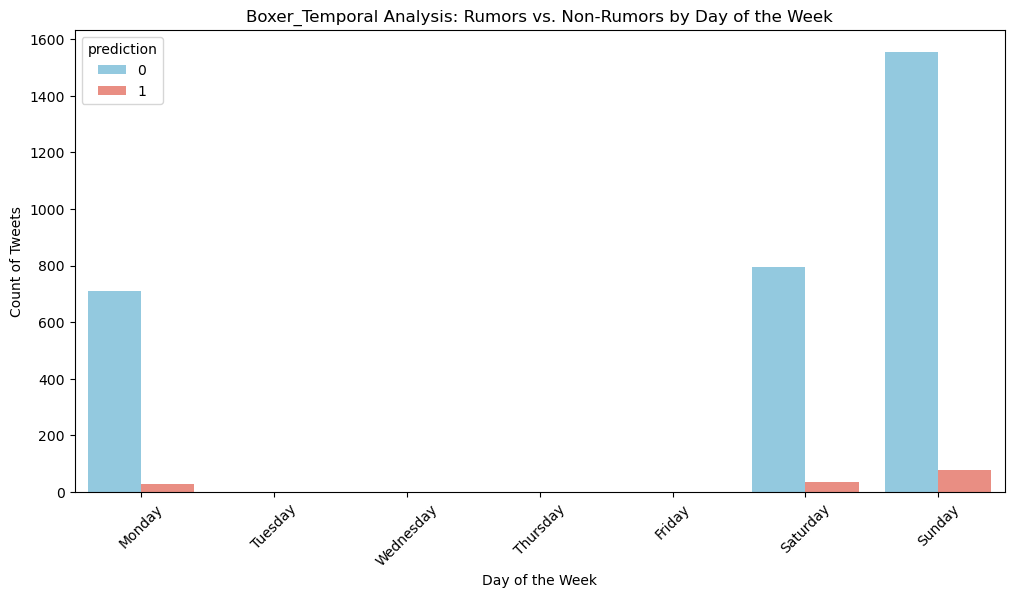

In [46]:
# Ensure 'Date Created' is in datetime format, coercing errors
df['Date Created'] = pd.to_datetime(df['Date Created'], errors='coerce')

# Check for any NaT values after conversion
invalid_dates = df[df['Date Created'].isna()]
print(f"Found {len(invalid_dates)} invalid dates.")

# Optional: Drop rows with invalid dates
df = df.dropna(subset=['Date Created'])

# If you need to convert to a specific local timezone, do it here
df['Date Created'] = df['Date Created'].dt.tz_convert('Asia/Tokyo')

# Extract hour and day of the week
df['hour'] = df['Date Created'].dt.hour
df['day_of_week'] = df['Date Created'].dt.day_name()

# Plot the distribution of tweets by hour of the day for rumors vs. non-rumors
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', hue='prediction', data=df, palette=['skyblue', 'salmon'])
plt.title('Boxer_Temporal Analysis: Rumors vs. Non-Rumors by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Tweets')
plt.xticks(rotation=0)
plt.show()

# Plot the distribution of tweets by day of the week for rumors vs. non-rumors
plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', hue='prediction', data=df, palette=['skyblue', 'salmon'],
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Boxer_Temporal Analysis: Rumors vs. Non-Rumors by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Tweets')
plt.xticks(rotation=45)
plt.show()

In [6]:
print(df.columns)

Index(['User', 'Date Created', 'Number of Likes', 'Source of Tweet', 'Tweet',
       'prediction'],
      dtype='object')
